# Task 4: Data Cleaning and Insight Generation from Survey Data 

## 1. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [35]:
df = pd.read_csv("kaggle_survey_2017_2021.csv")
# Display the first few rows of the DataFrame
print("Data loaded successfully.")
(df.head(10))

Data loaded successfully.


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_16,Q10_OTHER,Q11,Q12new,Q12_Part_1,Q12_Part_2,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_11,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_9,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_11,Q32_B_Part_13,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg.

>  perform initial inspection to understand its structure, identify missing values, and observe any inconsistencies.

> The dataset has already been loaded and the first few rows were displayed in the previous steps. The index rows 0 and 1 were also dropped. Now I need to inspect the DataFrame further by checking the data types, missing values, and descriptive statistics to understand the structure and identify any inconsistencies.

In [3]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')  # Remove leading/trailing spaces from column names
df.columns

Index(['-', 'Time_from_Start_to_Finish_(seconds)', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2',
       ...
       'Q38_B_Part_1', 'Q38_B_Part_2', 'Q38_B_Part_3', 'Q38_B_Part_4',
       'Q38_B_Part_5', 'Q38_B_Part_6', 'Q38_B_Part_7', 'Q38_B_Part_9',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=293)

In [4]:
# Disdplay all information about the DataFrame
print("DataFrame Information:")
df.info()  # Display DataFrame information to understand data types and non-null counts

# dataset shape
print("\nDataFrame Shape:", df.shape)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB

DataFrame Shape: (106302, 293)


In [5]:
# drop index row 0 
df = df.drop([0])
df.head()

,-,Time_from_Start_to_Finish_(seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_16,Q10_OTHER,Q11,Q12new,Q12_Part_1,Q12_Part_2,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_11,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_9,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_11,Q32_B_Part_13,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A laptop,NaN,NaN,Google Cloud TPUs,NaN,NaN,2-5 times,Matplotlib,Seaborn,NaN,Ggplot / ggplot2,Shiny,NaN,NaN,NaN,NaN,Leaflet / Folium,NaN,NaN,5-10 years,Scikit-learn,TensorFlow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caret,NaN,NaN,NaN,NaN,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Bayesian Approaches,NaN,"Dense Neural Netwo

## Data Cleaning

In [6]:
# Data Cleaning
# Convert all columns to string type
df = df.astype(str)
df.head()

,-,Time_from_Start_to_Finish_(seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_16,Q10_OTHER,Q11,Q12new,Q12_Part_1,Q12_Part_2,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_11,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_9,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_11,Q32_B_Part_13,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Python,nan,nan,nan,nan,nan,nan,nan,Vim / Emacs,nan,nan,nan,nan,Colab Notebooks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,A laptop,nan,nan,Google Cloud TPUs,nan,nan,2-5 times,Matplotlib,Seaborn,nan,Ggplot / ggplot2,Shiny,nan,nan,nan,nan,Leaflet / Folium,nan,nan,5-10 years,Scikit-learn,TensorFlow,nan,nan,nan,nan,nan,nan,nan,nan,nan,Caret,nan,nan,nan,nan,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Bayesian Approaches,nan,"Dense Neural Netwo

In [7]:
df.dtypes

-                                      object
Time_from_Start_to_Finish_(seconds)    object
Q1                                     object
Q2                                     object
Q3                                     object
Q4                                     object
Q5                                     object
Q6                                     object
Q7_Part_1                              object
Q7_Part_2                              object
Q7_Part_3                              object
Q7_Part_4                              object
Q7_Part_5                              object
Q7_Part_6                              object
Q7_Part_7                              object
Q7_Part_8                              object
Q7_Part_9                              object
Q7_Part_10                             object
Q7_Part_11                             object
Q7_Part_12                             object
Q7_OTHER                               object
Q8                                

In [8]:
# Generate descriptive statistics of numerical columns
display(df.describe())

,-,Time_from_Start_to_Finish_(seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_16,Q10_OTHER,Q11,Q12new,Q12_Part_1,Q12_Part_2,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_11,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_9,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_11,Q32_B_Part_13,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
count,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301,106301

> Handle missing value or NaN values

In [9]:
# Count missing values in each column
(df == 'nan').sum()

-                                           0
Time_from_Start_to_Finish_(seconds)     16716
Q1                                        445
Q2                                         95
Q3                                        121
Q4                                       2983
Q5                                       7214
Q6                                      13516
Q7_Part_1                               40359
Q7_Part_2                               85417
Q7_Part_3                               73211
Q7_Part_4                               96605
Q7_Part_5                               94683
Q7_Part_6                               91899
Q7_Part_7                               93551
Q7_Part_8                              105504
Q7_Part_9                              105861
Q7_Part_10                              97564
Q7_Part_11                              96981
Q7_Part_12                             106301
Q7_OTHER                               100009
Q8                                

In [10]:
# Calculate the percentage of 'nan' values for each column
nan_percentages = (df == 'nan').sum() / len(df) * 100
print(nan_percentages)

-                                        0.000000
Time_from_Start_to_Finish_(seconds)     15.725158
Q1                                       0.418623
Q2                                       0.089369
Q3                                       0.113828
Q4                                       2.806182
Q5                                       6.786390
Q6                                      12.714838
Q7_Part_1                               37.966717
Q7_Part_2                               80.353901
Q7_Part_3                               68.871412
Q7_Part_4                               90.878731
Q7_Part_5                               89.070658
Q7_Part_6                               86.451680
Q7_Part_7                               88.005757
Q7_Part_8                               99.250242
Q7_Part_9                               99.586081
Q7_Part_10                              91.780886
Q7_Part_11                              91.232444
Q7_Part_12                             100.000000


In [11]:
# Display columns with more than a certain percentage of 'nan' values (e.g., 50%)
high_nan_columns = nan_percentages[nan_percentages > 50]
print("Columns with more than 50% 'nan' values:")
print(high_nan_columns)

Columns with more than 50% 'nan' values:
Q7_Part_2         80.353901
Q7_Part_3         68.871412
Q7_Part_4         90.878731
Q7_Part_5         89.070658
Q7_Part_6         86.451680
Q7_Part_7         88.005757
Q7_Part_8         99.250242
Q7_Part_9         99.586081
Q7_Part_10        91.780886
Q7_Part_11        91.232444
Q7_Part_12       100.000000
Q7_OTHER          94.080959
Q9_Part_1         60.947686
Q9_Part_2         79.722674
Q9_Part_3         74.535517
Q9_Part_5         77.562770
Q9_Part_6         85.411238
Q9_Part_7         82.896680
Q9_Part_8         86.894761
Q9_Part_9         91.373552
Q9_Part_10        89.420608
Q9_Part_12       100.000000
Q9_OTHER          95.671725
Q10_Part_1        75.178032
Q10_Part_2        77.230694
Q10_Part_3        96.163724
Q10_Part_4        99.048927
Q10_Part_5        90.179773
Q10_Part_6        99.665102
Q10_Part_7        97.571048
Q10_Part_8        98.111965
Q10_Part_9        99.442150
Q10_Part_10       96.924770
Q10_Part_11       95.924780
Q10_Par

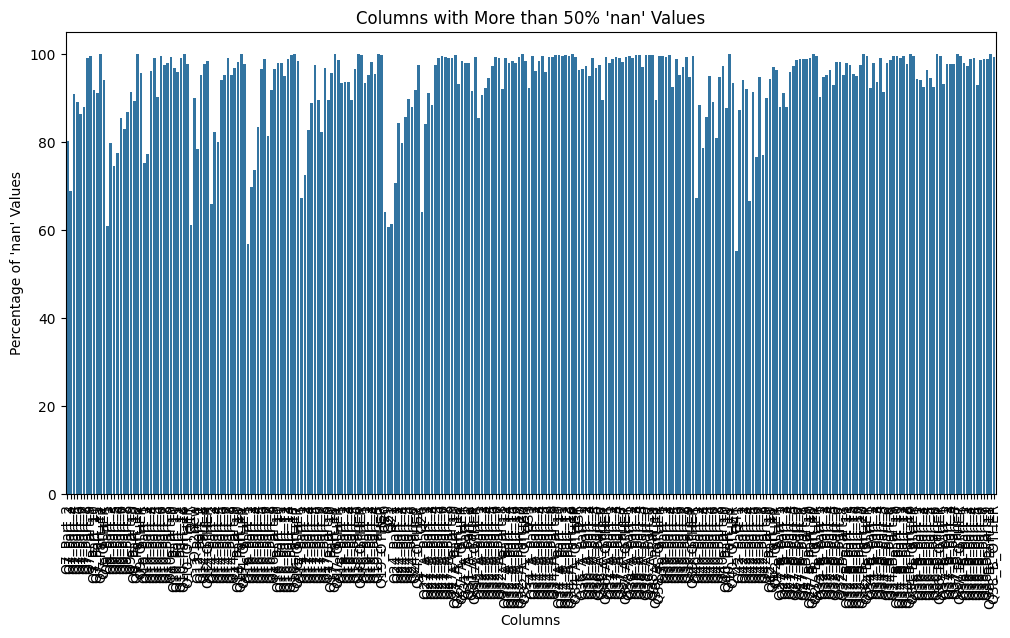

In [12]:
# visualize the High NaN columns
plt.figure(figsize=(12, 6))
sns.barplot(x=high_nan_columns.index, y=high_nan_columns.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of 'nan' Values")
plt.title("Columns with More than 50% 'nan' Values")
plt.show()

In [13]:
# Drop the column with more than 50% 'nan' values
df.drop(columns=high_nan_columns.index, inplace=True)
print("\nDataFrame Shape after dropping high 'nan' columns:", df.shape)



DataFrame Shape after dropping high 'nan' columns: (106301, 15)


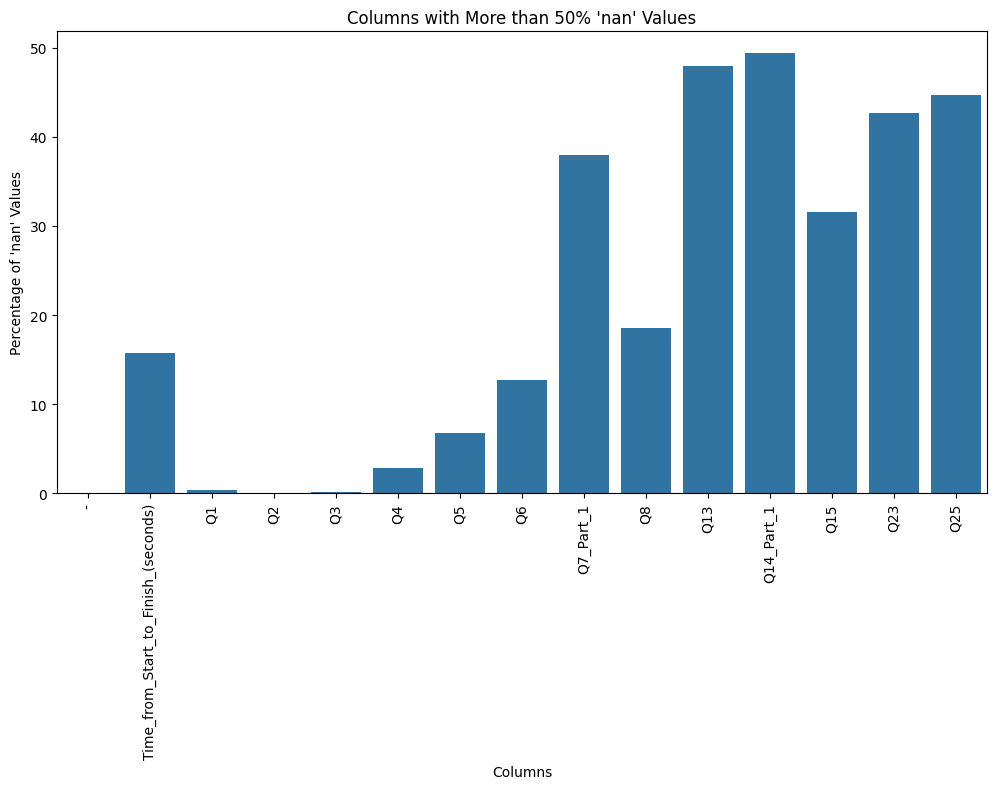

In [14]:
# Now visualize the remains column after drop columns which have 50% "nan" values
plt.figure(figsize=(12, 6))
sns.barplot(x=df.columns, y=(df == 'nan').sum() / len(df) * 100)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of 'nan' Values")
plt.title("Columns with More than 50% 'nan' Values")    
plt.show()

In [15]:
# Drop Nan values 
df= df.dropna()

In [16]:
df.isnull().sum()

-                                      0
Time_from_Start_to_Finish_(seconds)    0
Q1                                     0
Q2                                     0
Q3                                     0
Q4                                     0
Q5                                     0
Q6                                     0
Q7_Part_1                              0
Q8                                     0
Q13                                    0
Q14_Part_1                             0
Q15                                    0
Q23                                    0
Q25                                    0
dtype: int64

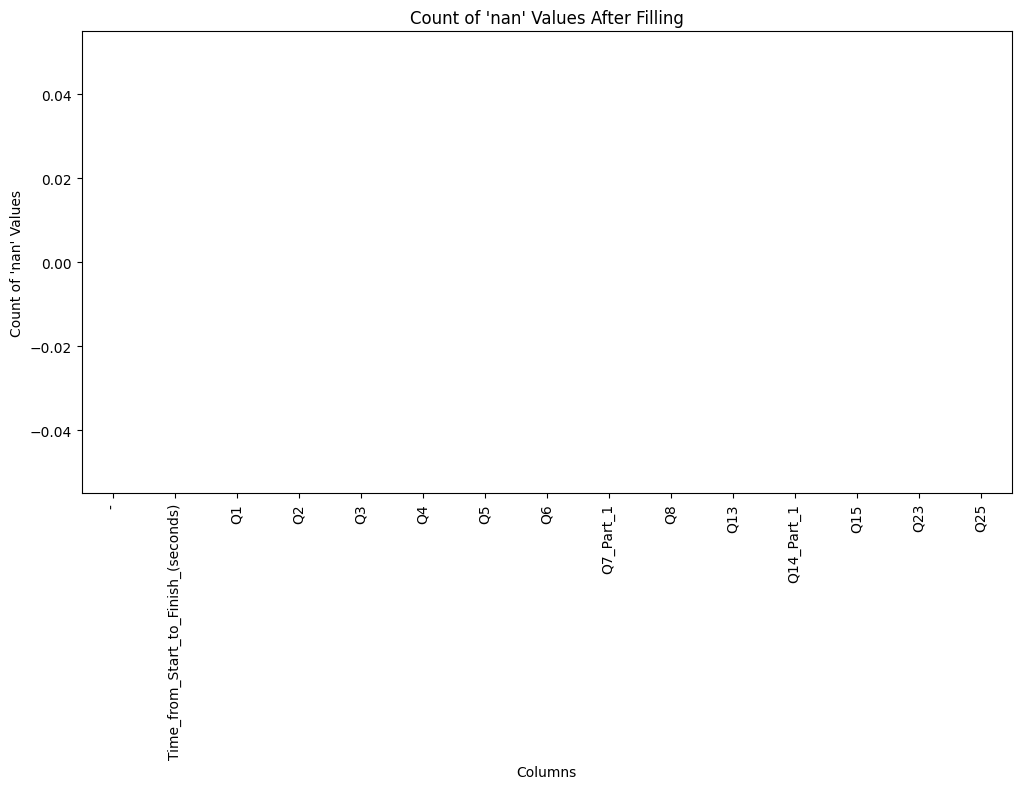

In [17]:
# Visualize the DataFrame after filling NaN values
plt.figure(figsize=(12, 6))
sns.barplot(x=df.columns, y=(df.isnull().sum()))
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Count of 'nan' Values")
plt.title("Count of 'nan' Values After Filling")
plt.show()

> Remove Duplicates

In [18]:
# Count duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates if any exist
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")
# Verify duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 4573
Duplicate rows removed.
Number of duplicate rows after removal: 0


In [19]:
df.shape

(101728, 15)

In [20]:
df.columns

Index(['-', 'Time_from_Start_to_Finish_(seconds)', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7_Part_1', 'Q8', 'Q13', 'Q14_Part_1', 'Q15', 'Q23',
       'Q25'],
      dtype='object')

In [21]:
df.head(10)

,-,Time_from_Start_to_Finish_(seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q8,Q13,Q14_Part_1,Q15,Q23,Q25
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,Python,2-5 times,Matplotlib,5-10 years,No (we do not use ML methods),"25,000-29,999"
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,nan,Python,Never,Matplotlib,Under 1 year,We are exploring ML methods (and may one day p...,"60,000-69,999"
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,Python,Never,Matplotlib,I do not use machine learning methods,I do not know,$0-999
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,More than 25 times,Matplotlib,5-10 years,I do not know,"30,000-39,999"
5,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,Python,Never,Matplotlib,10-20 years,We use ML methods for generating insights (but...,"30,000-39,999"
6,2021,1020,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,Python,2-5 times,Matplotlib,Under 1 year,nan,nan
7,2021,141,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,nan,Python,Never,nan,Under 1 year,nan,nan
8,2021,484,30-34,Man,India,Bachelorâ€™s degree,Data Scientist,5-10 years,Python,Python,2-5 times,Matplotlib,2-3 years,"We have well established ML methods (i.e., mod...","15,000-19,999"
9,2021,1744,22-24,Man,Russia,Bachelorâ€™s degree,Currently not employed,3-5 years,Python,Python,Never,Matplotlib,Under 1 year,nan,nan
10,2021,655,30-34,Man,Turkey,I prefer not to answer,Other,1-3 years,Python,SQL,Never,Matplotlib,Under 1 year,I do not know,$0-999


## Feature Enginerring

In [22]:
# rename the columns for better understanding
df = df.rename(columns={
    '-': 'Year',
    'Time_from_Start_to_Finish_(seconds)': 'Convert_in_minutes',
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Country',
    'Q4': 'Degree',
    'Q5': 'Profession', 
    'Q6': 'Experience_in_Data_Science',
    'Q8': 'First_Programming_Language',
    'Q13': 'Current_Employer_Size',
    'Q14_Part_1': 'Data_visualization_tools',
    'Q15': 'Job_Experience',
    'Q25': 'Annual_Compensation',
})


# convert 'Time_from_Start_to_Finish_(seconds)' in hours
df['Convert_in_minutes'] = df['Convert_in_minutes'].astype(float) / 60  # Convert seconds to minutes
df.head()

,Year,Convert_in_minutes,Age,Gender,Country,Degree,Profession,Experience_in_Data_Science,Q7_Part_1,First_Programming_Language,Current_Employer_Size,Data_visualization_tools,Job_Experience,Q23,Annual_Compensation
1,2021,15.166667,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,Python,2-5 times,Matplotlib,5-10 years,No (we do not use ML methods),"25,000-29,999"
2,2021,13.066667,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,nan,Python,Never,Matplotlib,Under 1 year,We are exploring ML methods (and may one day p...,"60,000-69,999"
3,2021,15.400000,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,Python,Never,Matplotlib,I do not use machine learning methods,I do not know,$0-999
4,2021,9.583333,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,More than 25 times,Matplotlib,5-10 years,I do not know,"30,000-39,999"
5,2021,13.016667,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,Python,Never,Matplotlib,10-20 years,We use ML methods for generating insights (but...,"30,000-39,999"


# Label Encoder or mapping of categorical variables

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Make a copy of df
df_encoded = df.copy()

# Store mappings for interpretation
label_mappings = {}

for col in ['Gender', 'Country', 'Degree', 'Profession', 'Experience_in_Data_Science',
            'First_Programming_Language', 'Current_Employer_Size',
            'Data_visualization_tools', 'Job_Experience']:
    
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Show encoded DataFrame
print(df_encoded.head())

# Show mapping dictionary
for col, mapping in label_mappings.items():
    print(f"\nMapping for {col}: {mapping}")


   Year  Convert_in_minutes    Age  Gender  Country  Degree  Profession  \
1  2021           15.166667  50-54       3       26       1          19   
2  2021           13.066667  50-54       3       27       6          24   
3  2021           15.400000  22-24       3       46       6          32   
4  2021            9.583333  45-49       3       38       2          27   
5  2021           13.016667  45-49       3       26       2          19   

   Experience_in_Data_Science Q7_Part_1  First_Programming_Language  \
1                          10    Python                          13   
2                           4       nan                          13   
3                           2    Python                          13   
4                           4    Python                          13   
5                          13    Python                          13   

   Current_Employer_Size  Data_visualization_tools  Job_Experience  \
1                      0                         0  

# Generate insights of encoded columns

In [24]:
print("Shape of DataFrame:", df_encoded.shape)
print("\nData Types:\n", df_encoded.dtypes)
print("\nSummary Statistics:\n", df_encoded.describe())


Shape of DataFrame: (101728, 15)

Data Types:
 Year                           object
Convert_in_minutes            float64
Age                            object
Gender                          int64
Country                         int64
Degree                          int64
Profession                      int64
Experience_in_Data_Science      int64
Q7_Part_1                      object
First_Programming_Language      int64
Current_Employer_Size           int64
Data_visualization_tools        int64
Job_Experience                  int64
Q23                            object
Annual_Compensation            object
dtype: object

Summary Statistics:
        Convert_in_minutes         Gender        Country         Degree  \
count        89427.000000  101728.000000  101728.000000  101728.000000   
mean           194.253042       2.847584      39.651699       4.151364   
std           1252.151842       1.771719      22.605760       3.062435   
min              0.266667       0.000000       0.00

> Missing values and duplicates

In [25]:
print("\nMissing values per column:\n", df_encoded.isnull().sum())
print("\nDuplicate rows:", df_encoded.duplicated().sum())



Missing values per column:
 Year                              0
Convert_in_minutes            12301
Age                               0
Gender                            0
Country                           0
Degree                            0
Profession                        0
Experience_in_Data_Science        0
Q7_Part_1                         0
First_Programming_Language        0
Current_Employer_Size             0
Data_visualization_tools          0
Job_Experience                    0
Q23                               0
Annual_Compensation               0
dtype: int64

Duplicate rows: 3


##### Replace the null values of Column(Convert_in_minutes) with the mean . 194.253042 is the mean of Convert_in_minutes

In [26]:
df_encoded = df_encoded.fillna(df_encoded.mean(numeric_only=True))

df_encoded.drop_duplicates(inplace=True)


In [27]:
# Dictionary to hold column names and their corresponding insights
insights = {}
column_names = {col: col for col in df_encoded.columns}
# Generate insights for each column
for column in df_encoded.columns:
    insights[column] = f"Insight for {column}: {df_encoded[column].value_counts()}"
# Display insights
for column, insight in insights.items():
    print(f"{column}: {insight}\n")



Year: Insight for Year: Year
2021    25936
2018    23835
2020    19988
2019    19665
2017    12301
Name: count, dtype: int64

Convert_in_minutes: Insight for Convert_in_minutes: Convert_in_minutes
194.253042      12301
8.300000          107
6.566667          107
8.150000          105
8.533333          104
8.450000          103
8.750000          103
8.816667          102
8.050000          102
9.866667          102
7.233333          102
8.033333          102
9.333333          102
9.150000          101
6.850000          100
7.466667          100
8.683333           99
9.300000           99
7.816667           99
8.516667           99
8.016667           98
7.116667           98
8.100000           98
7.983333           98
10.683333          98
9.016667           98
8.250000           98
10.083333          98
6.633333           97
7.166667           97
7.350000           97
8.783333           96
11.516667          96
8.966667           96
7.500000           96
7.050000           95
9.666667   

# Visualize the insights

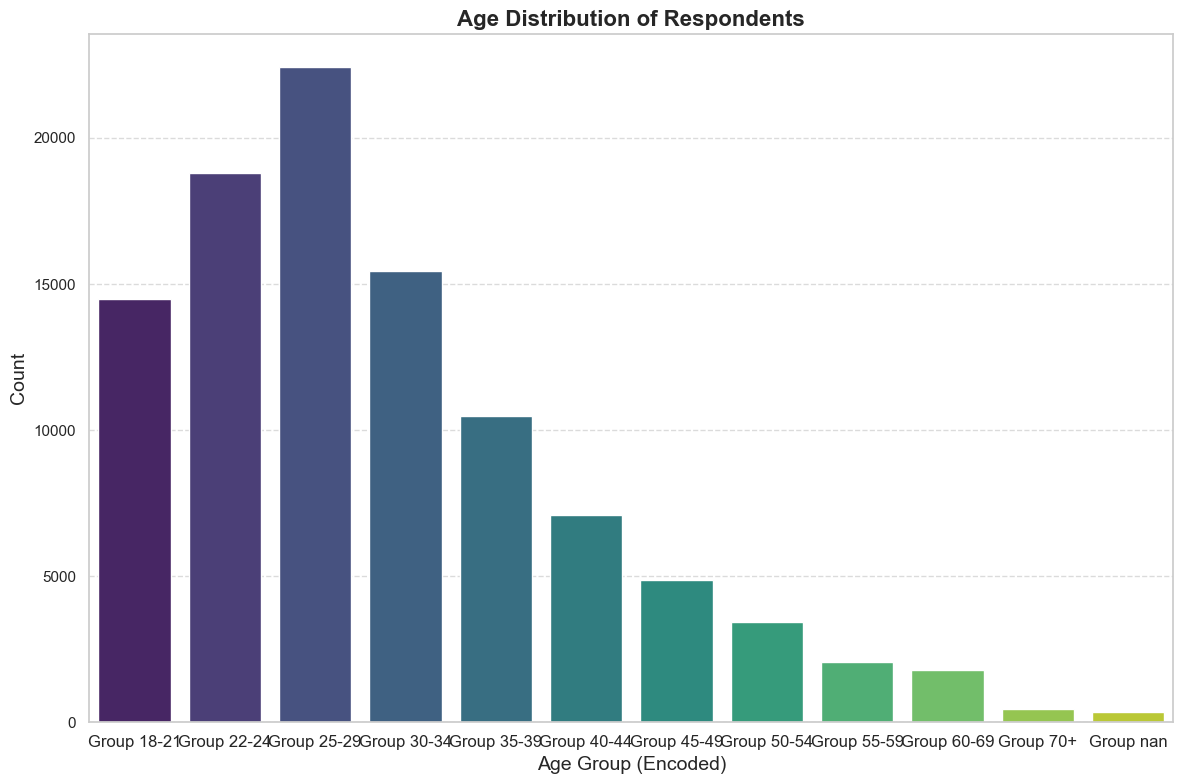

In [28]:
# Insight 1: Age Distribution (Q1)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
age_counts = df['Age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.title('Age Distribution of Respondents', fontsize=16, fontweight='bold')
plt.xlabel('Age Group (Encoded)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=age_counts.index, labels=[f'Group {i}' for i in age_counts.index], fontsize=12)
# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [29]:
for col in label_mappings.keys():
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True).round(2) * 100)  # Percentage distribution



--- Gender ---
Gender
Male                                                 44.0
Man                                                  36.0
Female                                                9.0
Woman                                                 9.0
Prefer not to say                                     1.0
Prefer to self-describe                               0.0
A different identity                                  0.0
Nonbinary                                             0.0
Non-binary, genderqueer, or gender non-conforming     0.0
nan                                                   0.0
Name: proportion, dtype: float64

--- Country ---
Country
India                                                   23.0
United States of America                                12.0
Other                                                    5.0
China                                                    3.0
Russia                                                   3.0
Brazil                            

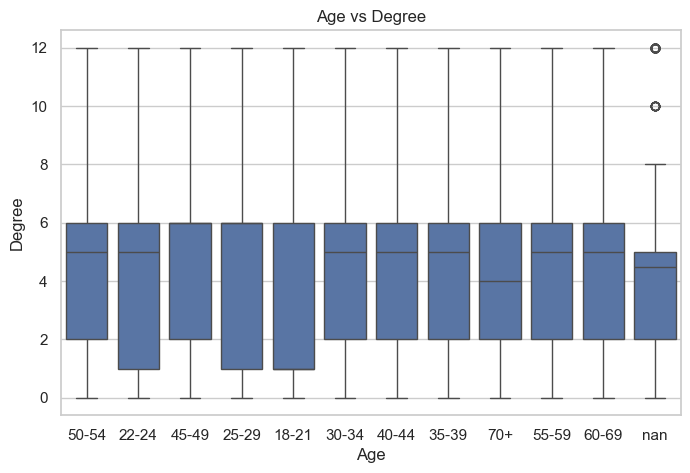

In [30]:
# Insight 2: Degree vs Age
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.boxplot(x="Age", y="Degree", data=df_encoded)
plt.title("Age vs Degree")
plt.show()


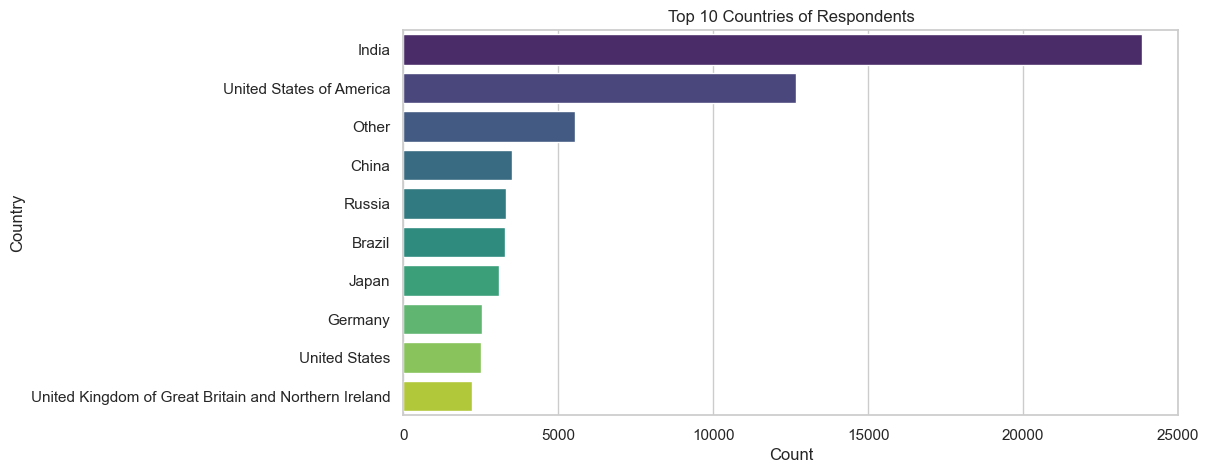

In [31]:
## Country (Top 10 countries)
plt.figure(figsize=(10,5))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries of Respondents")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


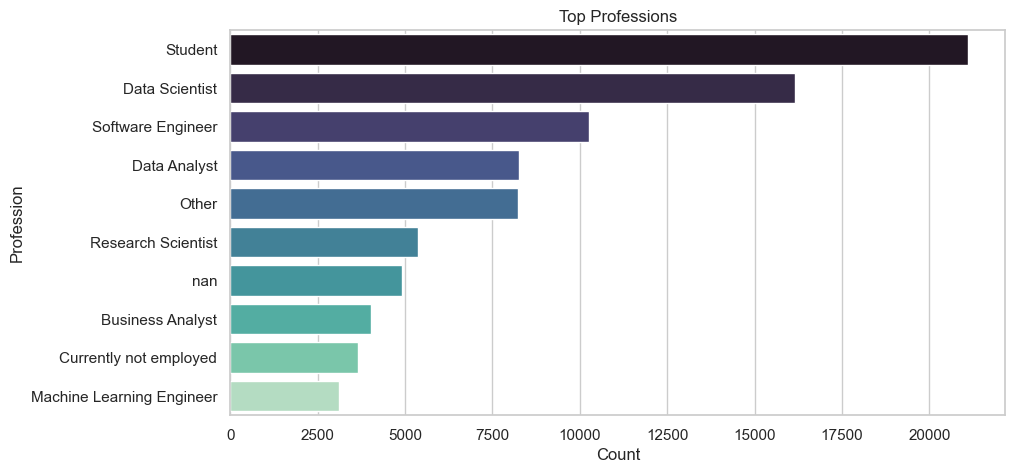

In [32]:
## Profession Distribution
plt.figure(figsize=(10,5))
top_prof = df['Profession'].value_counts().head(10)
sns.barplot(x=top_prof.values, y=top_prof.index, palette="mako")
plt.title("Top Professions")
plt.xlabel("Count")
plt.ylabel("Profession")
plt.show()

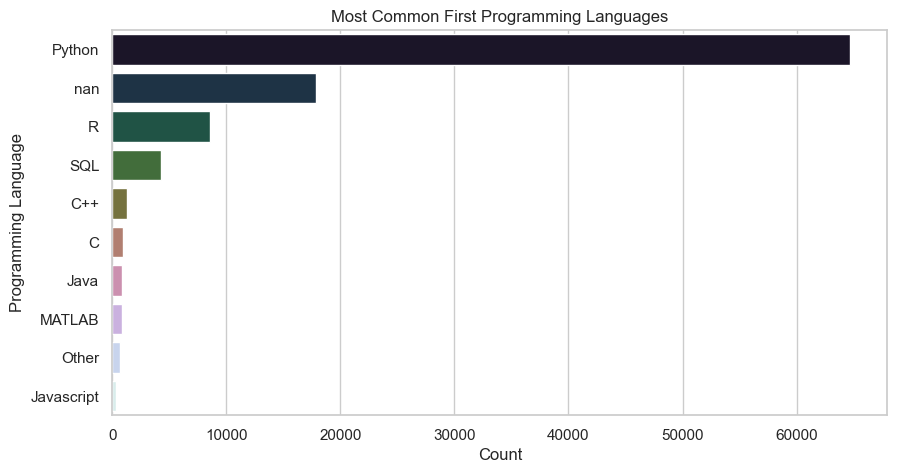

In [33]:

#  Skill Trends
## Programming Language (Top 10)
plt.figure(figsize=(10,5))
lang_counts = df['First_Programming_Language'].value_counts().head(10)
sns.barplot(x=lang_counts.values, y=lang_counts.index, palette="cubehelix")
plt.title("Most Common First Programming Languages")
plt.xlabel("Count")
plt.ylabel("Programming Language")
plt.show()

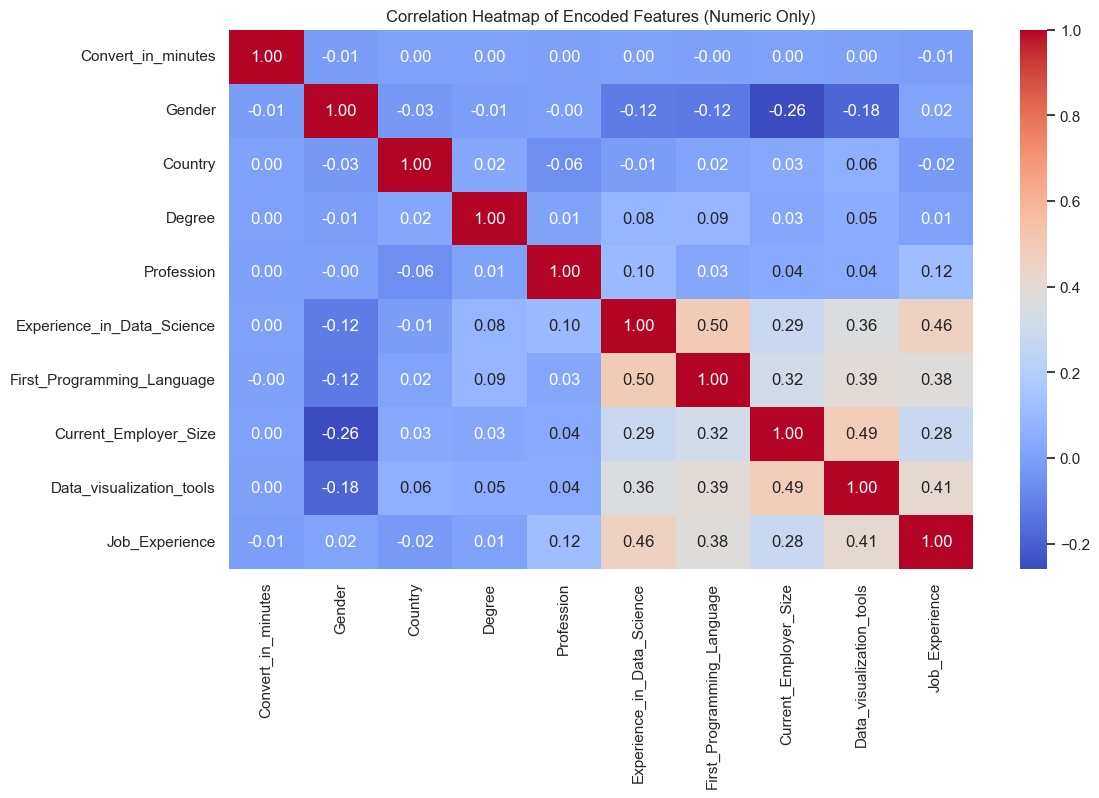

In [34]:
#Correlation Heatmap (Overall Insight)
# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Encoded Features (Numeric Only)")
plt.show()

#  Terminate 